# CREDIT CARD FRAUD PREDICTION 

##  **Introduction**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## **Dataset: An Overview**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## **Header**

 * Time: Time of the transaction (Counted in seconds)
 
 * Amount: Amount of transaction (in US Dollars)
 
 * V1-V28 : Features of a particular transaction
 
 * Class: Informs about whether the transaction in legit or not (0: Legit , 1: Fraud)
 
 ## **Acknowledgements**
This public dataset can be found on this [link](https://www.kaggle.com/mlg-ulb/creditcardfraud).

## **Process for this model building**
1. Importing necessary libraries and dataset
2. Getting familiar with the dataset
3. Cleaning the dataset
4. Explanatory Data Analysis
5. Preprocessing the dataset
6. Splitting the data into Train and Test data
7. Training the model using Train data
8. Checking the accuracy score of the model

 ## **Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

## **Loading Data**

In [2]:
cre_data=pd.read_csv('D:\Downloads\\creditcard.csv')

**First 5 Rows of the dataset**

In [3]:
cre_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Last 5 rows of the dataset**

In [4]:
cre_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


* **Finding:**

The last entry of time is 172792 seconds which is equal to 2 Days of Dataset.

## **Data Cleaning**


In [5]:
cre_data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

<AxesSubplot:>

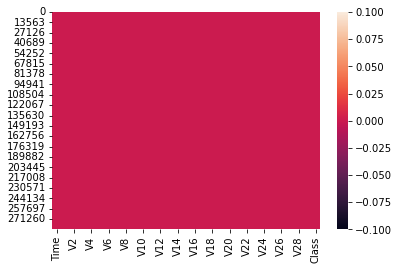

In [6]:
sns.heatmap(cre_data.isnull())

## Explanatory Data Analysis

In [7]:
cre_data.shape

(284807, 31)

In [8]:
cre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
cre_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
cre_data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [11]:
cre_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

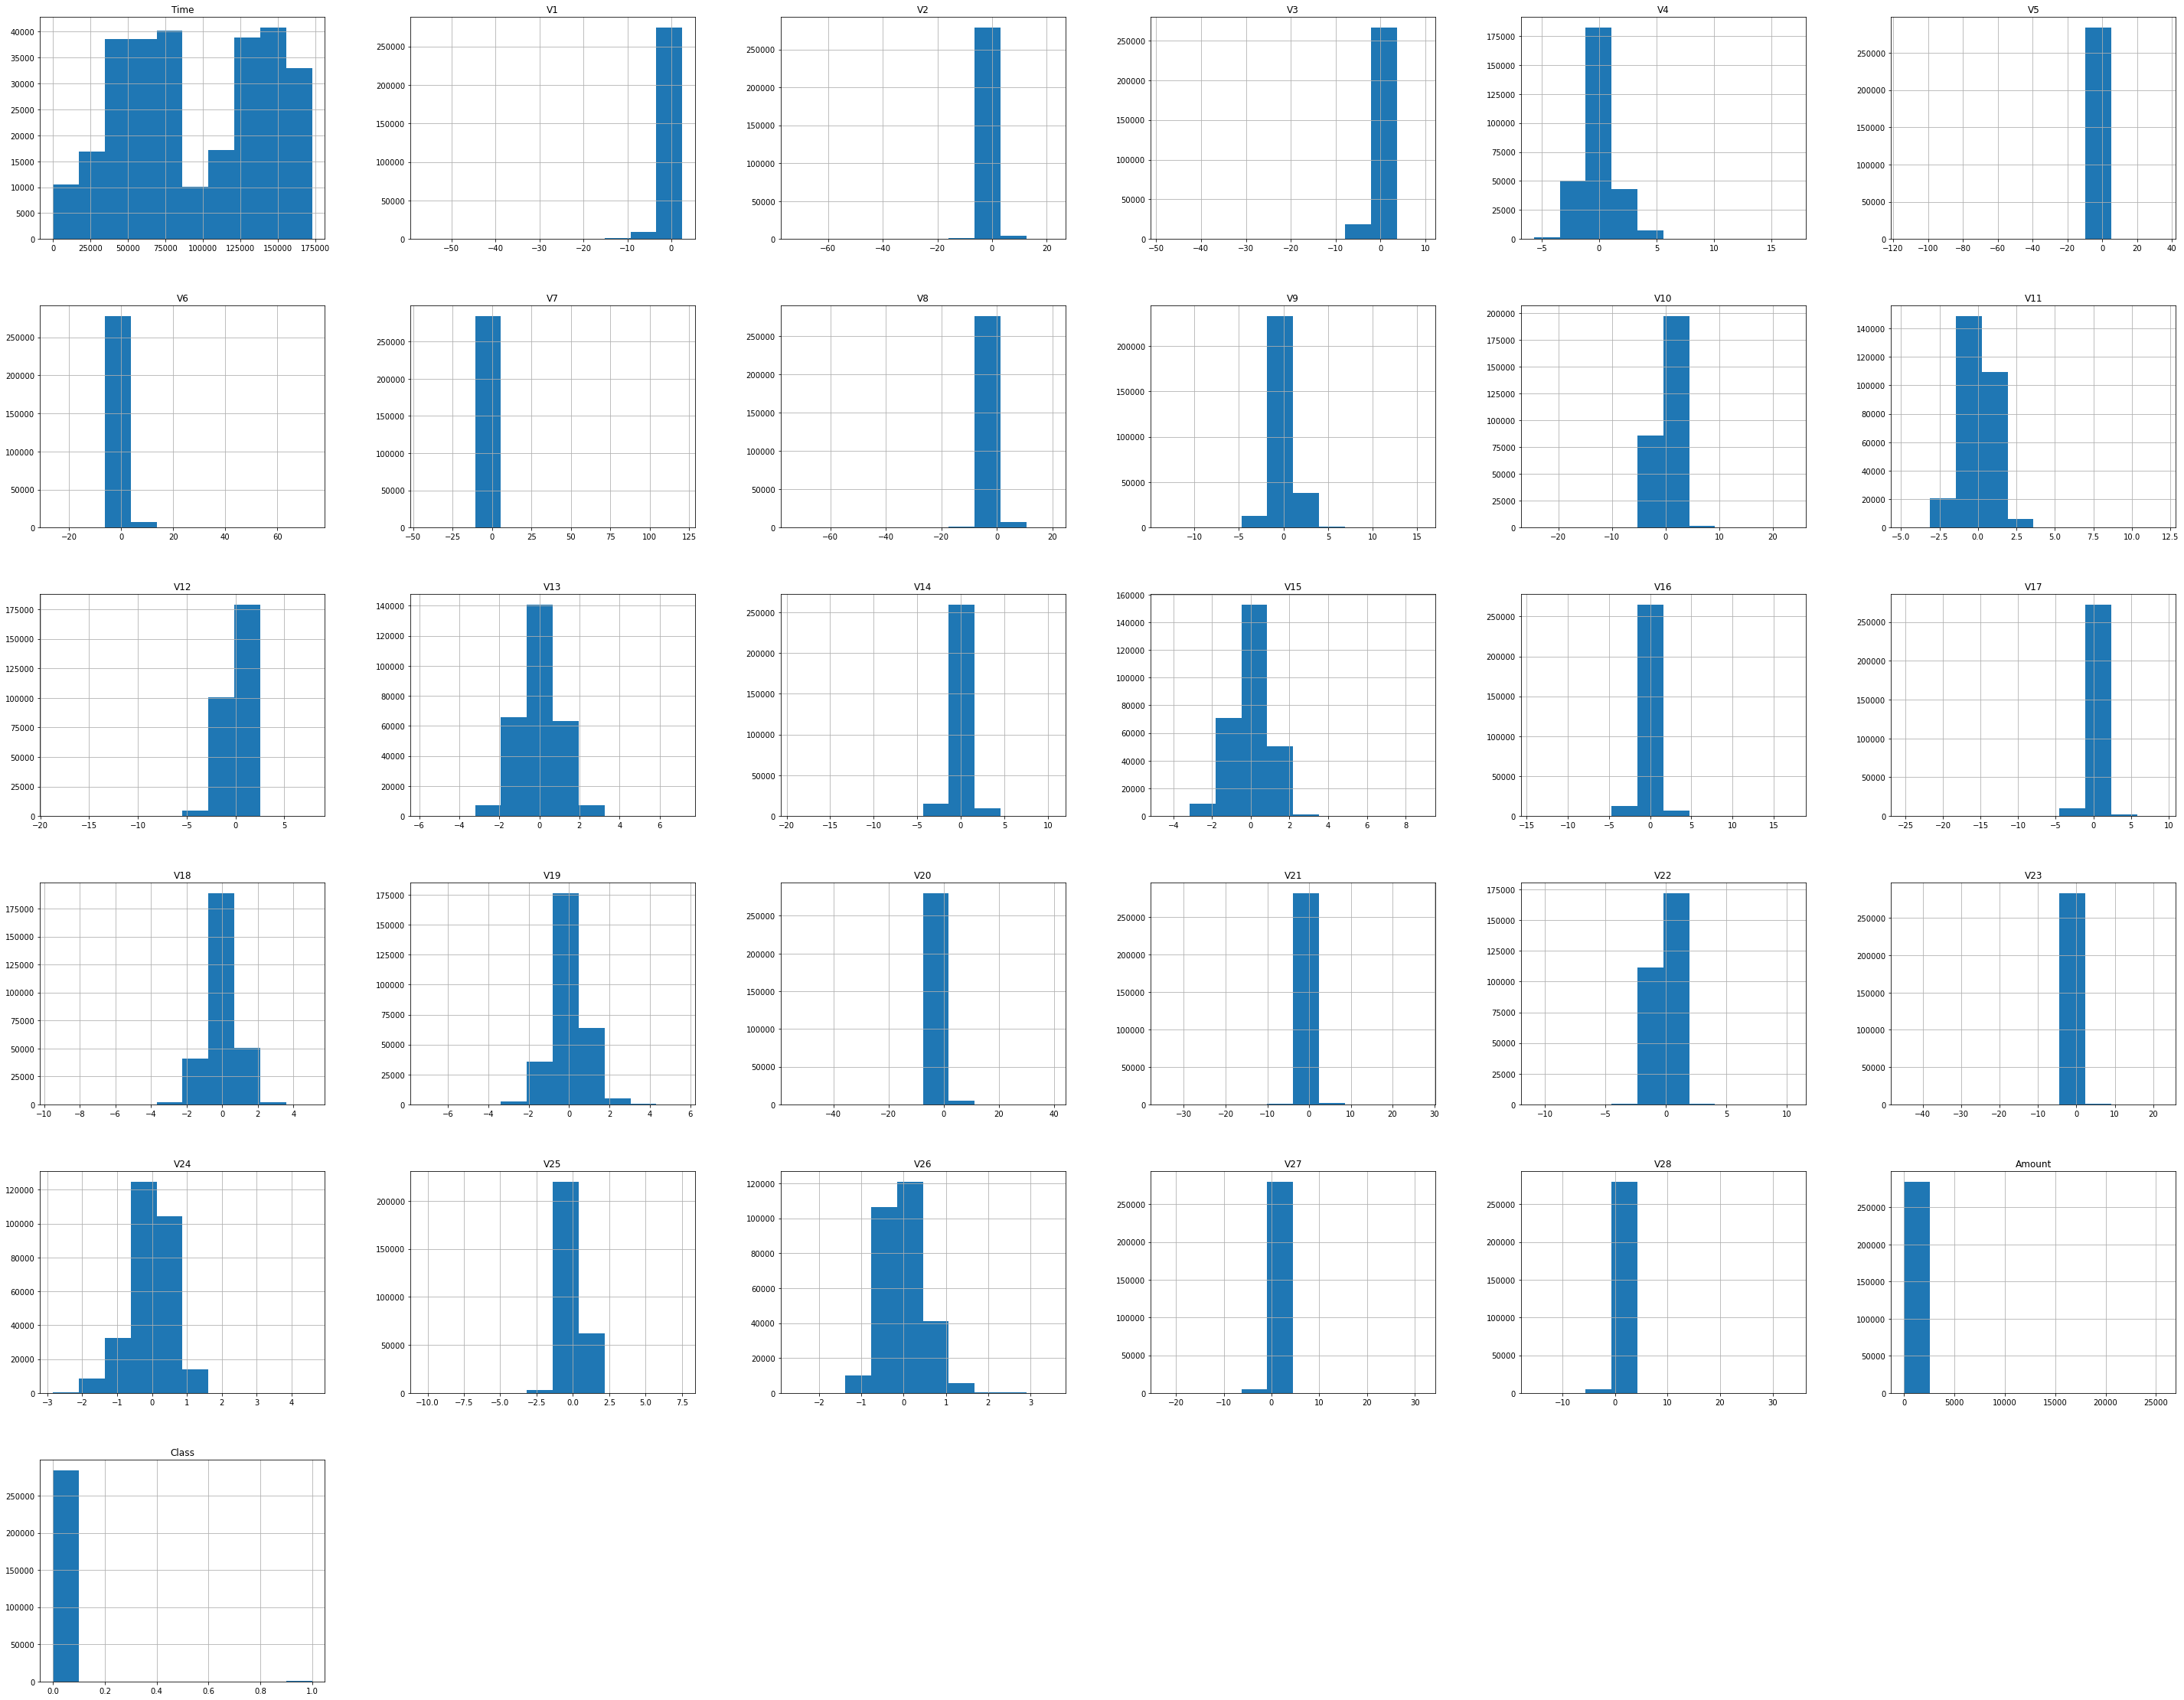

In [12]:
cre_data.hist(figsize=(50,40))

<AxesSubplot:>

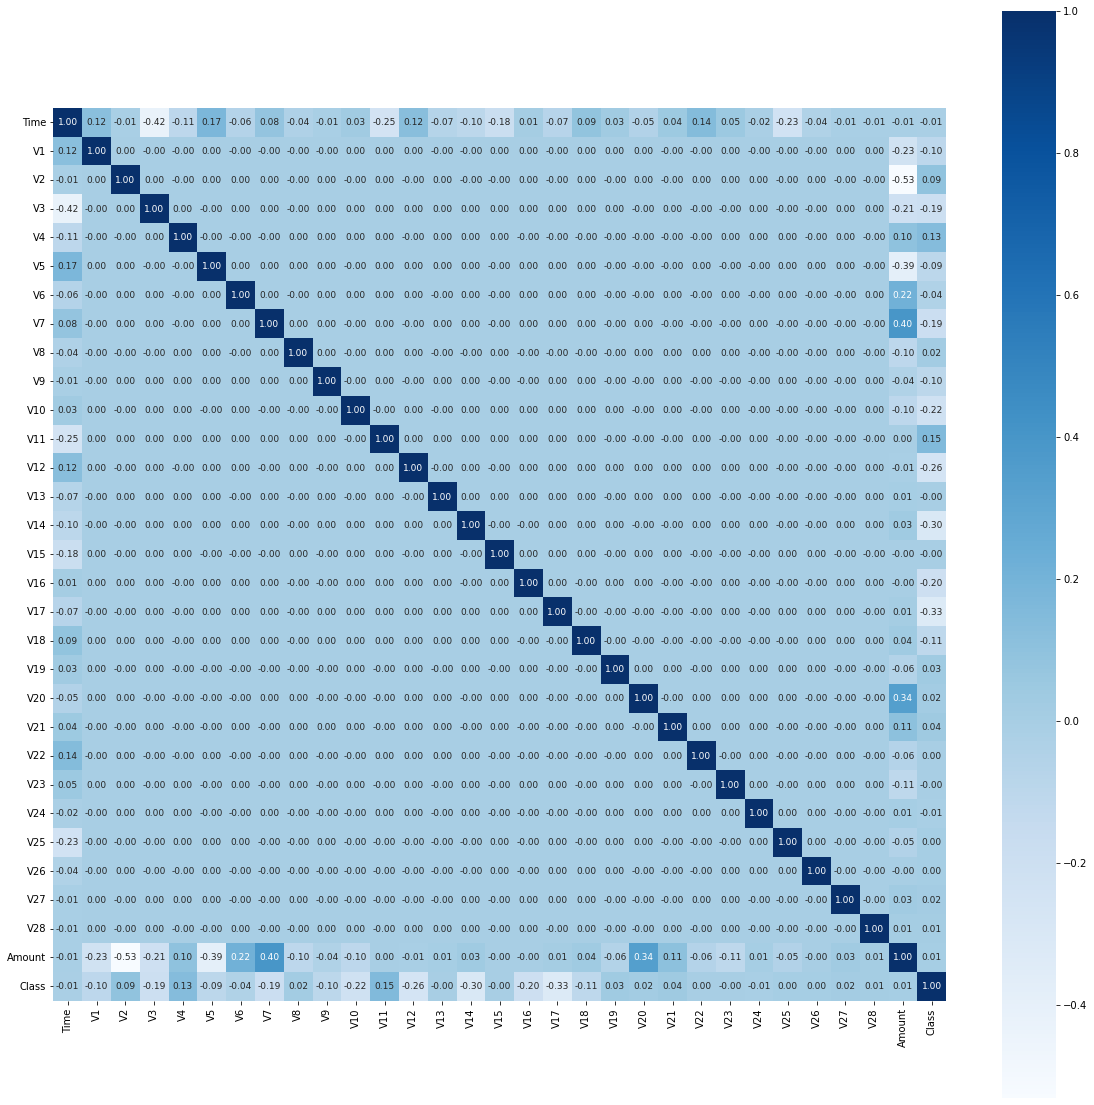

In [13]:
correlation=cre_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={"size":9},cmap='Blues')

C:\Users\Shivam\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

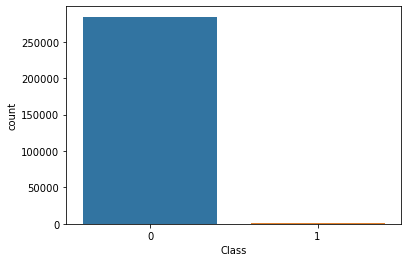

In [14]:
sns.countplot("Class",data=cre_data)

# Data Preprocessing

**Label Encoding: no need to do as already all the labels are in numeric form**

In [15]:
cre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Data Standarization:The Process of Standarizing the data to a common format and common range**

In [16]:
x=cre_data.drop(['Class'],axis=1)
y=cre_data['Class']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standard_x=scaler.fit_transform(x)

In [18]:
standard_x

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

**Handling Imbalance Data**

In [19]:
cre_data.value_counts('Class')

Class
0    284315
1       492
dtype: int64

* **Finding: Data is Imbalance**

In [20]:
x=standard_x
y=cre_data["Class"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(284807, 30) (256326, 30) (28481, 30)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
logmodel=LogisticRegression()
from sklearn.metrics import roc_curve,roc_auc_score


In [24]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=logmodel.predict(x_test)

0.9992977774656788
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.94      0.63      0.76        49

    accuracy                           1.00     28481
   macro avg       0.97      0.82      0.88     28481
weighted avg       1.00      1.00      1.00     28481



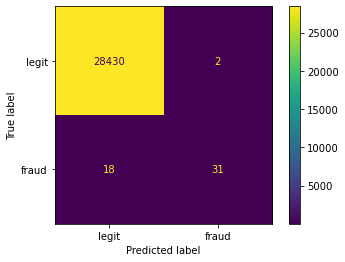

In [26]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['legit','fraud'])
cmd.plot()
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



**Under Sampling**

In [27]:
from collections import Counter
Counter(y_train)

Counter({0: 255883, 1: 443})

In [28]:
!pip install imblearn

In [29]:
!pip install imbalanced-learn

In [30]:
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
x_train_ns,y_train_ns=ns.fit_resample(x_train,y_train)
print(" The number of classes before fit{}".format(Counter(y_train)))
print(" The number of classes after fit{}".format(Counter(y_train_ns)))

C:\Users\Shivam\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


 The number of classes before fitCounter({0: 255883, 1: 443})
 The number of classes after fitCounter({0: 553, 1: 443})


0.5815104806713247
              precision    recall  f1-score   support

           0       1.00      0.58      0.73     28432
           1       0.00      0.86      0.01        49

    accuracy                           0.58     28481
   macro avg       0.50      0.72      0.37     28481
weighted avg       1.00      0.58      0.73     28481



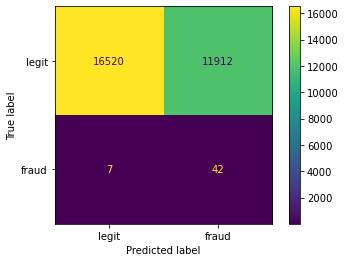

In [31]:
logmodel.fit(x_train_ns,y_train_ns)
y_pred=logmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['legit','fraud'])
cmd.plot()
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

**Finding: Accuracy of Logistic Regression model from undersampling method is 58.15%.**

**Oversampling**

In [32]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.5)
x_train_os,y_train_os=os.fit_resample(x_train,y_train)
print(" The number of classes before fit{}".format(Counter(y_train)))
print(" The number of classes after fit{}".format(Counter(y_train_os)))

C:\Users\Shivam\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


 The number of classes before fitCounter({0: 255883, 1: 443})
 The number of classes after fitCounter({0: 255883, 1: 127941})


0.9901688845195042
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28432
           1       0.14      0.90      0.24        49

    accuracy                           0.99     28481
   macro avg       0.57      0.94      0.62     28481
weighted avg       1.00      0.99      0.99     28481



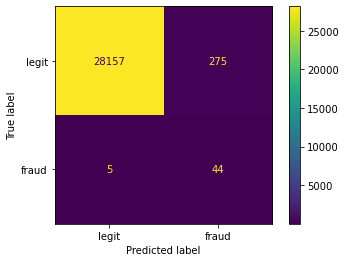

In [33]:
logmodel.fit(x_train_os,y_train_os)
y_pred=logmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['legit','fraud'])
cmd.plot()
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

**Finding: Accuracy of Logistic Regression model from undersampling method is 99.02%.**


**Conclusion: From the above three methods of handling of highly imbalanced data, oversampling provides us the highest accuracy for Logustic regression model.**

## **MODEL FITTING**

**K-Nearest Neighbours**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_os,y_train_os)
y_pred_knn=knn.predict(x_test)

**Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dtree.fit(x_train_os,y_train_os)
y_pred_dtree=dtree.predict(x_test)

**Support Vector Machine**

In [38]:
from sklearn.svm import SVC
svm=SVC(kernel="linear",C=0.025,random_state=101)
svm.fit(x_train_os,y_train_os)
y_pred_svm=svm.predict(x_test)

**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfm= RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=15)
rfm.fit(x_train_os,y_train_os)
y_pred_rfm=rfm.predict(x_test)

**Logistic Regression**

In [42]:
logmodel1=LogisticRegression()
logmodel1.fit(x_train_os,y_train_os)
y_pred_logistic=logmodel.predict(x_test)

## **Plot ROC and Compare AUC**

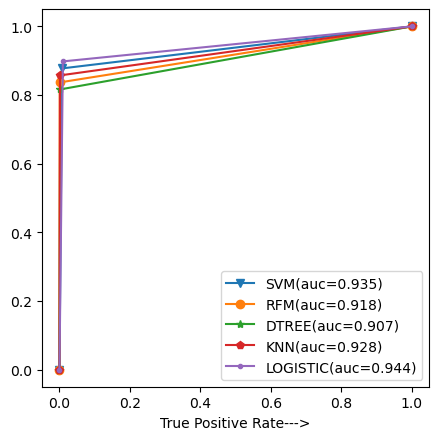

In [43]:
from sklearn.metrics import roc_curve,auc

logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)

knn_fpr, knn_tpr,threshold=roc_curve(y_test,y_pred_knn)
auc_knn=auc(knn_fpr, knn_tpr)

dtree_fpr, dtree_tpr,threshold=roc_curve(y_test,y_pred_dtree)
auc_dtree=auc(dtree_fpr, dtree_tpr)

svm_fpr, svm_tpr,threshold=roc_curve(y_test,y_pred_svm)
auc_svm=auc(svm_fpr,svm_tpr)

rfm_fpr, rfm_tpr,threshold=roc_curve(y_test,y_pred_rfm)
auc_rfm=auc(rfm_fpr, rfm_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(svm_fpr, svm_tpr,marker='v',label='SVM(auc=%.3f)'%auc_svm)
plt.plot(rfm_fpr, rfm_tpr,marker='o',label='RFM(auc=%.3f)'%auc_rfm)
plt.plot(dtree_fpr, dtree_tpr,marker='*',label='DTREE(auc=%.3f)'%auc_dtree)
plt.plot(knn_fpr, knn_tpr,marker='p',label='KNN(auc=%.3f)'%auc_knn)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

**Result: From the above ROC Curves, we concluded that
    The algorithm of Logistic Regression outperformed all other algorithms and gives the highest accuracy of 94.4%.**